# ***Salary Data Test***

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
test = pd.read_csv("/content/SalaryData_Test.csv", encoding = "ISO-8859-1")

In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
test.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
test['relationship'] = test['relationship'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
freq_Sw = pd.Series(' '.join(test['relationship']).split()).value_counts()[:20]
freq_Sw

Husband           6203
Not-in-family     3976
Own-child         2160
Unmarried         1576
Wife               685
Other-relative     460
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(test["relationship"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [ ]:
word_freq_df.head(25)

,term,occurrences,frequency
0,child,2160,0.084270
1,family,3976,0.155119
2,husband,6203,0.242002
3,in,3976,0.155119
4,not,3976,0.155119
5,other,460,0.017946
6,own,2160,0.084270
7,relative,460,0.017946
8,unmarried,1576,0.061486
9,wife,685,0.026724


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 3000, max_df = 0.5, smooth_idf=True) 
doc_vec = vectorizer.fit_transform(test["relationship"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [ ]:
df

,child,family,husband,relative,unmarried,wife
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
15055,1.0,0.0,0.0,0.0,0.0,0.0
15056,0.0,1.0,0.0,0.0,0.0,0.0
15057,0.0,0.0,1.0,0.0,0.0,0.0
15058,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(test["relationship"], n=200) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,not in,3976
1,in family,3976
2,own child,2160
3,other relative,460


[Text(0, 0, 'not in'),
 Text(0, 0, 'in family'),
 Text(0, 0, 'own child'),
 Text(0, 0, 'other relative')]

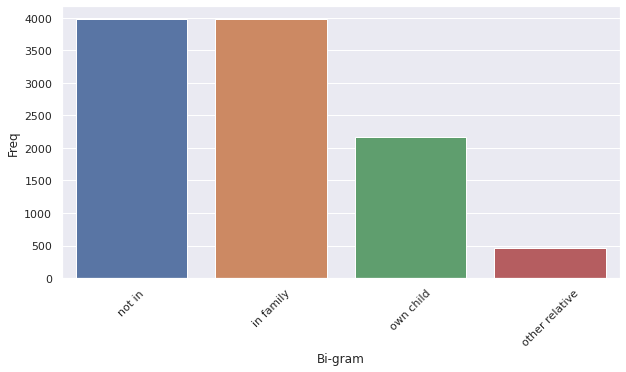

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [ ]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=4000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(test["relationship"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,not in family,3976


[Text(0, 0, 'not in family')]

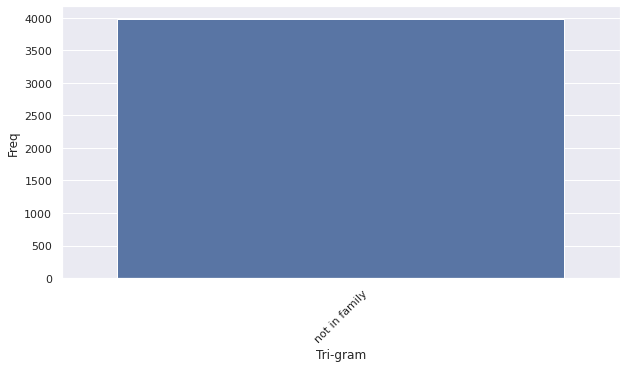

In [ ]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [ ]:
string_Total = " ".join(test["relationship"])

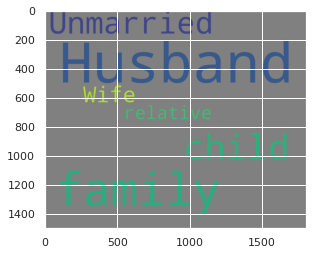

In [ ]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'gray',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
def split_into_words(i):
    return (i.split(" "))


In [ ]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(test,test_size=0.4)

In [ ]:
email_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
9308,45,Private,Doctorate,16,Divorced,Sales,Not-in-family,White,Male,99999,0,55,United-States,>50K
8501,46,State-gov,Assoc-voc,11,Divorced,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
7596,59,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
12016,17,Local-gov,11th,7,Never-married,Prof-specialty,Own-child,White,Female,0,0,7,United-States,<=50K
2085,35,Private,Masters,14,Married-spouse-absent,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,26,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
930,33,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,46,United-States,<=50K
13684,26,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
3203,50,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1848,48,United-States,>50K


In [ ]:
emails_bow = CountVectorizer(analyzer=split_into_words).fit(test.relationship)


In [ ]:
all_emails_matrix = emails_bow.transform(test.relationship)
all_emails_matrix.shape 

(15060, 6)

In [ ]:
train_emails_matrix = emails_bow.transform(email_train.relationship)
train_emails_matrix.shape 


test_emails_matrix = emails_bow.transform(email_test.relationship)
test_emails_matrix.shape 

(6024, 6)

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB


In [ ]:
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.age)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.age) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.age) # 96%

In [ ]:
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.age.values)
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.age) # 95%

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.age) # 8%

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape 


test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape 


(6024, 6)

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.age)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.age) 

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.age) 


In [ ]:
accuracy_train_m

0.048251438689685705

In [ ]:
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.age.values)
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.age) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.age)

In [ ]:
accuracy_test_g

0.010126162018592297

# ***Salary Data Train***

In [ ]:
train = pd.read_csv("/content/SalaryData_Train.csv",encoding = "ISO-8859-1")

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['workclass'] = train['workclass'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
freq_Sw = pd.Series(' '.join(train['workclass']).split()).value_counts()[:20] 
freq_Sw

Private             22285
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(train["workclass"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [ ]:
word_freq_df.head(30)

,term,occurrences,frequency
0,emp,3573,0.081004
1,federal,943,0.021379
2,gov,4289,0.097236
3,inc,3573,0.081004
4,local,2067,0.046861
5,not,2499,0.056655
6,pay,14,0.000317
7,private,22285,0.505226
8,self,3573,0.081004
9,state,1279,0.028996


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 2000, max_df = 0.5, smooth_idf=True) 
doc_vec = vectorizer.fit_transform(train["workclass"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [ ]:
df

,emp,federal,gov,local,pay,self,state
0,0.000000,0.0,0.578517,0.0,0.0,0.000000,0.81567
1,0.707107,0.0,0.000000,0.0,0.0,0.707107,0.00000
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...
30156,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
30157,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
30158,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
30159,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000


In [ ]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(train["workclass"], n=400) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,self emp,3573
1,emp not,2499
2,not inc,2499
3,local gov,2067
4,state gov,1279


[Text(0, 0, 'self emp'),
 Text(0, 0, 'emp not'),
 Text(0, 0, 'not inc'),
 Text(0, 0, 'local gov'),
 Text(0, 0, 'state gov'),
 Text(0, 0, 'emp inc'),
 Text(0, 0, 'federal gov'),
 Text(0, 0, 'without pay')]

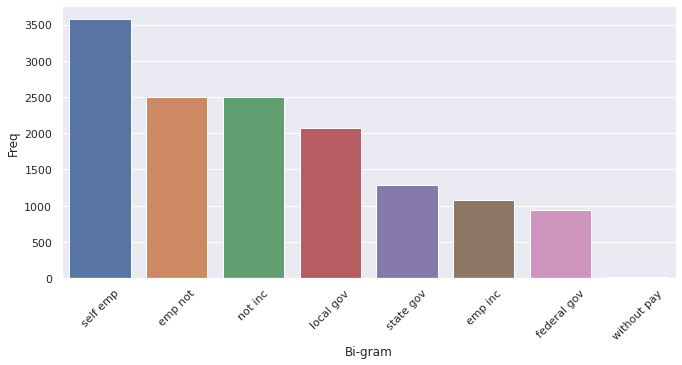

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:22,:]
fig = plt.figure(figsize = (11, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [ ]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=3000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(train["workclass"], n=400)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,self emp not,2499
1,emp not inc,2499
2,self emp inc,1074


[Text(0, 0, 'self emp not'),
 Text(0, 0, 'emp not inc'),
 Text(0, 0, 'self emp inc')]

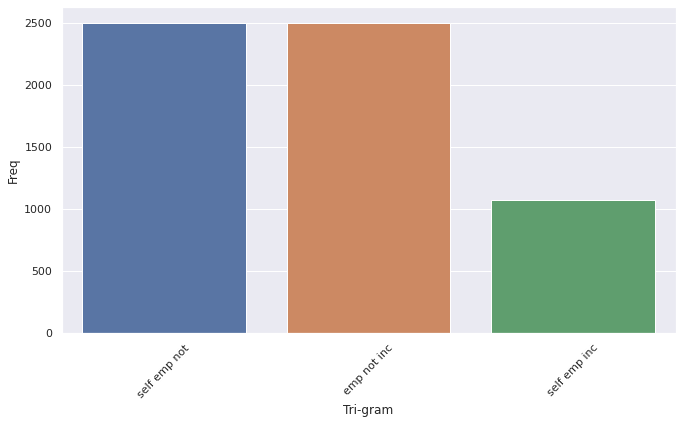

In [ ]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:22,:]
fig = plt.figure(figsize = (11, 6))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=46,labels = top20_trigram["Tri-gram"])

In [ ]:
string_Total = " ".join(train["workclass"])

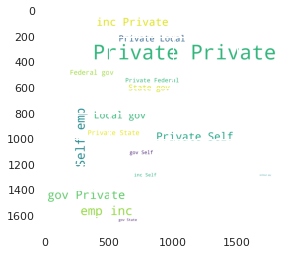

In [ ]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'white',
                width = 1900,
                height = 1700
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
def split_into_words(i):
    return (i.split(" "))


In [ ]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(train,test_size=0.3)

In [ ]:
email_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
24669,25,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
24420,43,Private,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
22289,23,Private,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,30,United-States,<=50K
25542,25,Self-emp-not-inc,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,30,United-States,<=50K
23733,59,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,29,Private,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
8313,25,Private,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,48,United-States,<=50K
17075,35,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
emails_bow = CountVectorizer(analyzer=split_into_words).fit(train.workclass)


In [ ]:
all_emails_matrix = emails_bow.transform(train.workclass)
all_emails_matrix.shape 

(30161, 7)

In [ ]:
train_emails_matrix = emails_bow.transform(email_train.workclass)
train_emails_matrix.shape 


test_emails_matrix = emails_bow.transform(email_test.workclass)
test_emails_matrix.shape 

(9049, 7)

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.hoursperweek)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.hoursperweek) 

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.hoursperweek) 

In [ ]:
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.hoursperweek.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.hoursperweek) # 95%

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.hoursperweek) 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)


train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape 

test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape


(9049, 7)

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB


classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.hoursperweek)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.hoursperweek) 

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.hoursperweek)

In [ ]:
accuracy_train_m

0.47266957180750285

In [ ]:
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.hoursperweek.values) 
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.hoursperweek)
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.hoursperweek) 


In [ ]:
accuracy_test_g

0.0005525472427892584